# Managing textual data using pandas

This section introduces how to prepare and manage textual data for analysis using [pandas](http://pandas.pydata.org/), a Python library for working with tabular data.

After reading this section, you should know:

- how to import data into a pandas DataFrame
- how to explore data stored in a pandas DataFrame
- how to append data to a pandas DataFrame
- how to save the data in a pandas DataFrame

## Importing data to pandas

Let's start by importing the pandas library. 

Note that we can control the name of the imported module using the `as` addition to the `import` command. pandas is commonly abbreviated `pd`.

This allows us to use the variable `pd` to refer to the *pandas* library.

In [1]:
import pandas as pd

### Importing data from a single file

You must often load and prepare the data yourself, either from a single file or from multiple files.

Typical formats for distributing corpora include CSV files, which stands for Comma-separated Values, and JSON, which stands for JavaScript Object Notation or simple plain text files.

pandas provides plenty of functions for [reading data in various formats](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html). You can even try importing Excel sheets!

The following example shows how to load a corpus from a CSV file for processing in Python using the [SFU Opinion and Comments Corpus (SOCC)](https://github.com/sfu-discourse-lab/SOCC) (Kolhatkar et al. [2020](https://doi.org/10.1007/s41701-019-00065-w)).

Let's load a part of the SFU Opinion and Comments Corpus, which contains the opinion articles from [The Globe and Mail](https://www.theglobeandmail.com/), a Canadian newspaper.

We can use the `read_csv()` function from *pandas* to read files with comma-separated values, such as the SOCC corpus.

The `read_csv()` function takes a string object as input, which defines a path to the input file.

In [2]:
# Read the CSV file and assign the output to the variable 'socc'
socc = pd.read_csv('data/socc_gnm_articles.csv')

pandas does all the heavy lifting and returns the contents of the CSV file in a pandas [DataFrame](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html), which is data structure native to pandas.

In [3]:
# Examine the type of the object stored under the variable 'socc'
type(socc)

pandas.core.frame.DataFrame

Let's use the `head()` method of a DataFrame to check out the first five rows in the DataFrame.

In [4]:
socc.head(5)

,article_id,title,article_url,author,published_date,ncomments,ntop_level_comments,article_text
0,26842506,The Tories deserve another mandate - Stephen H...,http://www.theglobeandmail.com/opinion/editori...,GLOBE EDITORIAL,2015-10-16 EDT,2187.0,1378.0,<p>All elections are choices among imperfect a...
1,26055892,Harper hysteria a sign of closed liberal minds,http://www.theglobeandmail.com/opinion/harper-...,Konrad Yakabuski,2015-08-24 EDT,1103.0,455.0,<p>If even a fraction of the darkness that his...
2,6929035,Too many first nations people live in a dream ...,http://www.theglobeandmail.com/opinion/too-man...,Jeffrey Simpson,2013-01-05 EST,1164.0,433.0,<p>Large elements of aboriginal Canada live in...
3,19047636,The Globe's editorial board endorses Tim Hudak...,http://www.theglobeandmail.com/opinion/editori...,GLOBE EDITORIAL,2014-06-06 EDT,905.0,432.0,"<p>Over four days, The Globe editorial board l..."
4,11672346,Disgruntled Arab states look to strip Canada o...,http://www.theglobeandmail.com/news/world/disg...,Campbell Clark,2013-05-02 EDT,1129.0,411.0,<p>Growing discontent among Arab nations over ...


As you can see, the DataFrame has a tabular form.

The DataFrame contains several columns such as **article_id**, **title** and **article_text**, accompanied by an index for each row (**0, 1, 2, 3, 4**).

The `.at[]` accessor can be used to inspect a single item in the DataFrame.

Let's examine the value in the column **title** at index 123.

In [5]:
socc.at[123, 'title']

"How Toronto got a 'world-class,' gold-plated, half-billion-dollar empty train"

### Quick exercise

Let's go back to the SOCC corpus stored under the variable `socc`.

Who is the author (`author`) of article at index 256? 

How many top-level comments (`ntop_level_comments`) did the article at index 1000 receive?

In [6]:
### Enter your code below this line and run the cell (press Shift and Enter at the same time)


### Importing data from multiple files

Another common scenario is that you have multiple files with text data, which you want to load into *pandas*.

Let's first collect the files that we want to load.

In [7]:
# Import the patch library
from pathlib import Path

# Create a Path object that points to the directory with data
corpus_dir = Path('data')

# Get all .txt files in the corpus directory
corpus_files = list(corpus_dir.glob('*.txt'))

# Check the corpus files
corpus_files

[PosixPath('data/WP_1990-08-10-25A.txt'),
 PosixPath('data/mod_WP_1990-08-10-25A.txt'),
 PosixPath('data/NYT_1991-01-16-A15.txt'),
 PosixPath('data/WP_1991-01-17-A1B.txt'),
 PosixPath('data/mod_WP_1991-01-17-A1B.txt'),
 PosixPath('data/mod_NYT_1991-01-16-A15.txt')]

To accommodate our data, let's create an empty pandas DataFrame and specify its *shape* in advance, that is, the number of rows (`index`) and the names of the columns `columns`.

We can determine the number of rows needed using Python's `range()` function. This function generates a list of numbers that fall within certain range, which we can use for the index of the DataFrame.

In this case, we define a `range()` between `0` and the number of text files in the directory, which are stored under the variable `corpus_files`. We retrieve their number using the `len()` function, which returns the length of Python objects, if applicable.

For the columns of the DataFrame, we simply create columns for filenames and their textual content by providing a list of strings to the `columns` argument.

In [8]:
# Create a DataFrame and assign the result to the variable 'df'
df = pd.DataFrame(index=range(0, len(corpus_files)), columns=['filename', 'text'])

# Call the variable to inspect the output
df

,filename,text
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
5,NaN,NaN


Now that we have an empty data with rows for each file in the corpus, we can loop over the file paths under `corpus_files` and add their contents to the DataFrame.

In [9]:
# Loop over the corpus files and count each loop using enumerate()
for i, f in enumerate(corpus_files):
    
    # Open the file for reading
    c_file = open(f, encoding="utf-8")
    
    # Get the filename from the Path object
    filename = f.name
        
    # Read the file contents
    text = c_file.read()
    
    # Assign the text from the file to index 'i' at column 'text'
    # using the .at accessor – note that this modifies the DataFrame
    # "in place" – you don't need to assign the result into a variable
    df.at[i, 'text'] = text
    
    # We then do the same to the filename
    df.at[i, 'filename'] = filename

Let's check the result by calling the variable `df`.

In [10]:
df

,filename,text
0,WP_1990-08-10-25A.txt,﻿*We Don’t Stand for Bullies': Diverse Voices ...
1,mod_WP_1990-08-10-25A.txt,﻿*We Don’t Stand for Bullies': Diverse Voices ...
2,NYT_1991-01-16-A15.txt,﻿U.S. TAKING STEPS TO CURB TERRORISM: F.B.I. I...
3,WP_1991-01-17-A1B.txt,"﻿U.S., Allies Launch Massive Air War Against T..."
4,mod_WP_1991-01-17-A1B.txt,﻿U.S Allies Launch Massive Air War Against Tar...
5,mod_NYT_1991-01-16-A15.txt,﻿U.S. TAKING STEPS TO CURB TERRORISM: F.B.I. I...


As you can see, the DataFrame has been populated with filenames and text.

Now that we know how to load data into DataFrames, we can turn towards accessing and manipulating the data that they store.

## Examining DataFrames

pandas DataFrames can hold a lot of information, which is often organised into columns.

The columns present in a DataFrame are accessible through the attribute `columns`.

In [11]:
# Retrieve the columns and their names
socc.columns

Index(['article_id', 'title', 'article_url', 'author', 'published_date',
       'ncomments', 'ntop_level_comments', 'article_text'],
      dtype='object')

pandas provides various methods for examining the contents of entire columns, which can be accessed just like the keys and values of a Python dictionary.

The brackets `[]` can be used to access entire columns by placing the column name within the brackets as a string.

Let's retrieve the contents of the column `author`, which contains author information.

In [12]:
socc['author']

0         GLOBE EDITORIAL
1        Konrad Yakabuski
2         Jeffrey Simpson
3         GLOBE EDITORIAL
4          Campbell Clark
               ...       
10334     GLOBE EDITORIAL
10335     GLOBE EDITORIAL
10336     GLOBE EDITORIAL
10337      Adam Radwanski
10338     GLOBE EDITORIAL
Name: author, Length: 10339, dtype: object

As you can see, the column `author` contains 10399 objects, as indicated by the *Length* and *dtype* properties. The numbers on the left-hand side give the index, that is, the row numbers.

The columns of a pandas DataFrame consist of another object type, namely *pandas* Series. You can think of the DataFrame as an entire table, whose columns consist of Series.

We can verify this by examining their type using Python's `type()` function.

In [13]:
type(socc), type(socc['author'])

(pandas.core.frame.DataFrame, pandas.core.series.Series)

When printing out the contents of a DataFrame or Series, pandas omits everything between the first and last five rows by default. This is convenient when working with thousands of rows.

This also applies to the output for methods such as `value_counts()`, which allows counting the number of unique values in a Series.

In [14]:
socc['author'].value_counts()

GLOBE EDITORIAL                     2712
Jeffrey Simpson                      649
Margaret Wente                       547
Konrad Yakabuski                     404
Gary Mason                           365
                                    ... 
Michael Brown                          1
JOHN BOYKO                             1
Claire Berlinski                       1
SAMANTHA NUTT                          1
Peter Jones and Philippe Lagassé       1
Name: author, Length: 1896, dtype: int64

Not surprisingly, the editorial team at the *The Globe and Mail* is responsible for most of the editorials!

Let's take another look at the data by visualising the result by calling the `.plot()` method for the author information column. This method calls an external library named matplotlib, which can be used to produce all kinds of plots and visualisations.

More specifically, we instruct the `plot()` method to draw a bar chart by providing the string `bar` to the `kind` argument.

We also use the brackets `[:10]` to limit the output to the ten most profilic authors.

<AxesSubplot:>

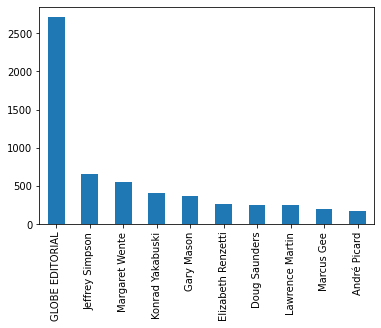

In [15]:
# This is some Jupyter magic that allows us to render matplotlib plots in the notebooks!
# You only need to enter this command once.
%matplotlib inline

# Count the values in the column 'author' and clip the result to top-10 before plotting.
socc['author'].value_counts()[:10].plot(kind='bar')

For columns with numerical values, we can also use the `describe()` method to get basic descriptive statistics on the data.

In [16]:
socc['ntop_level_comments'].describe()

count    10339.000000
mean        26.384273
std         39.786923
min          0.000000
25%          1.000000
50%         14.000000
75%         35.000000
max       1378.000000
Name: ntop_level_comments, dtype: float64

As we can see, the column `ntop_level_comments` has a total of 10339 rows. 

The average number of comments received by an editorial is approximately 26, but this number fluctuates, as the standard deviation from the average is nearly 40.

 - Some editorials do not have any comments at all, as indicated by the minimum value of 0. 
 - The lowest quartile shows that 25% of the data has only one comment or less (none).
 - The second quartile (50%), which is also known as the median, indicates that *half* of the data has less than 14 comments and *half* has more than 14 comments. 
 - The third quartile shows that 75% of the data has 35 comments or less. 
 - The most commented editorial has 1378 comments.

What if we would like to find the articles with zero comments?

We can use the DataFrame accessor `.loc` to access columns or rows based on their labels.

The number of comments is stored in the column `ntop_level_comments`, but we also need to specify that the DataFrame stored under the variable `socc` contains the column that we wish to examine. 

This causes the somewhat repetitive reference to the `socc` DataFrame, which is nevertheless necessary for being explicit.

We also need to provide a command for "is equal to". Since the single equal sign `=` is reserved for assigning variables in Python, two equal signs `==` are used for comparison.

Finally, we place the value we want to evaluate against on the right-hand side of the double equal sign `==`, that is, zero for no comments.

In [17]:
socc.loc[socc['ntop_level_comments'] == 0]

,article_id,title,article_url,author,published_date,ncomments,ntop_level_comments,article_text
7797,33441604,"Joseph Boyden, where are you from?",http://www.theglobeandmail.com/opinion/joseph-...,Hayden King,2016-12-28 EST,0.0,0.0,<p>Hayden King teaches in the School of Public...
7798,33316285,Globe editorial: Rejoice! Congress just gave t...,http://www.theglobeandmail.com/opinion/editori...,GLOBE EDITORIAL,2016-12-13 EST,0.0,0.0,<p>The United States may have just elected a p...
7799,33009790,Police and La Presse: Warrants not warranted,http://www.theglobeandmail.com/opinion/editori...,GLOBE EDITORIAL,2016-11-23 EST,0.0,0.0,<p>The discovery that the Montreal Police obta...
7800,32970624,The Galloway affair: Salem comes to UBC,http://www.theglobeandmail.com/opinion/the-gal...,Margaret Wente,2016-11-22 EST,0.0,0.0,<p>I have a question about the Steven Galloway...
7801,32927142,Justice delayed: the law of unintended consequ...,http://www.theglobeandmail.com/opinion/unreaso...,BENJAMIN PERRIN,2016-11-19 EST,0.0,0.0,<p>Benjamin Perrin is a law professor at the U...
...,...,...,...,...,...,...,...,...
10334,533784,WTO action on China's rare-earth quotas makes ...,http://www.theglobeandmail.com/opinion/editori...,GLOBE EDITORIAL,2012-03-14 EDT,0.0,0.0,<p>The confusingly named substances known as '...
10335,533594,A customer-friendly Finance Department,http://www.theglobeandmail.com/opinion/editori...,GLOBE EDITORIAL,2012-03-13 EDT,0.0,0.0,<p>Of the many things that frustrate the retai...
10336,533508,Video raises questions about Nik Zoricic's 'fr...,http://www.theglobeandmail.com/opinion/editori...,GLOBE EDITORIAL,2012-03-12 EDT,0.0,0.0,<p>Officials and fans are mourning the death o...
10337,533504,McGuinty can't afford misgivings about gaming,http://www.theglobeandmail.com/news/politics/m...,Adam Radwanski,2012-03-12 EDT,0.0,0.0,<p>Unlike so many of the other measures that m...


This returns a total of 2542 rows where the value of the column `ntop_level_comments` is zero.

For more complex views of the data, we can also combine multiple criteria using the `&` symbol, which is the Python operator for "AND".

Note that individual criteria must be placed in parentheses `()` to perform the operation.

Let's check if the first author in our result, Hayden King, wrote any other articles with zero comments.

In [18]:
socc.loc[(socc['ntop_level_comments'] == 0) & (socc['author'] == 'Hayden King')]

,article_id,title,article_url,author,published_date,ncomments,ntop_level_comments,article_text
7797,33441604,"Joseph Boyden, where are you from?",http://www.theglobeandmail.com/opinion/joseph-...,Hayden King,2016-12-28 EST,0.0,0.0,<p>Hayden King teaches in the School of Public...


### Quick in-class exercise

How many articles with zero top-level comments were authored by the editorial team (`GLOBE EDITORIAL`)?

Write out the whole command yourself instead of copy-pasting to get an idea of the syntax.

In [19]:
### Enter your code below this line and run the cell (press Shift and Enter at the same time)


## Extending DataFrames

You can easily add information to *pandas* DataFrames.

One common scenario could involve loading some data from an external file (such as a CSV or JSON file), performing some analyses and storing the results to the same DataFrame.

We can easily add an empty column to the DataFrame. This is achieved using the column accessor `[]` and the Python datatype `None`.

Let's add a new column named `comments_ratio` to the DataFrame `socc`.

In [20]:
socc['comments_ratio'] = None

In [21]:
socc.head(5)

,article_id,title,article_url,author,published_date,ncomments,ntop_level_comments,article_text,comments_ratio
0,26842506,The Tories deserve another mandate - Stephen H...,http://www.theglobeandmail.com/opinion/editori...,GLOBE EDITORIAL,2015-10-16 EDT,2187.0,1378.0,<p>All elections are choices among imperfect a...,None
1,26055892,Harper hysteria a sign of closed liberal minds,http://www.theglobeandmail.com/opinion/harper-...,Konrad Yakabuski,2015-08-24 EDT,1103.0,455.0,<p>If even a fraction of the darkness that his...,None
2,6929035,Too many first nations people live in a dream ...,http://www.theglobeandmail.com/opinion/too-man...,Jeffrey Simpson,2013-01-05 EST,1164.0,433.0,<p>Large elements of aboriginal Canada live in...,None
3,19047636,The Globe's editorial board endorses Tim Hudak...,http://www.theglobeandmail.com/opinion/editori...,GLOBE EDITORIAL,2014-06-06 EDT,905.0,432.0,"<p>Over four days, The Globe editorial board l...",None
4,11672346,Disgruntled Arab states look to strip Canada o...,http://www.theglobeandmail.com/news/world/disg...,Campbell Clark,2013-05-02 EDT,1129.0,411.0,<p>Growing discontent among Arab nations over ...,None


Let's populate the column with some data by calculating which percentage of the comments are top-level comments, assuming that a high percentage of top-level comments indicates comments about the article, whereas a lower percentage indicates more discussion about the comments posted.

To get the proportion of top-level comments out of all comments, we must divide the number of top-level comments by the number of all comments.

In [22]:
socc['comments_ratio'] = socc['ntop_level_comments'] / socc['ncomments']

Column accessors can be used very flexibly to access and manipulate data stored in the DataFrame, as exemplified by the division.

In [23]:
socc.head(5)

,article_id,title,article_url,author,published_date,ncomments,ntop_level_comments,article_text,comments_ratio
0,26842506,The Tories deserve another mandate - Stephen H...,http://www.theglobeandmail.com/opinion/editori...,GLOBE EDITORIAL,2015-10-16 EDT,2187.0,1378.0,<p>All elections are choices among imperfect a...,0.630087
1,26055892,Harper hysteria a sign of closed liberal minds,http://www.theglobeandmail.com/opinion/harper-...,Konrad Yakabuski,2015-08-24 EDT,1103.0,455.0,<p>If even a fraction of the darkness that his...,0.412511
2,6929035,Too many first nations people live in a dream ...,http://www.theglobeandmail.com/opinion/too-man...,Jeffrey Simpson,2013-01-05 EST,1164.0,433.0,<p>Large elements of aboriginal Canada live in...,0.371993
3,19047636,The Globe's editorial board endorses Tim Hudak...,http://www.theglobeandmail.com/opinion/editori...,GLOBE EDITORIAL,2014-06-06 EDT,905.0,432.0,"<p>Over four days, The Globe editorial board l...",0.477348
4,11672346,Disgruntled Arab states look to strip Canada o...,http://www.theglobeandmail.com/news/world/disg...,Campbell Clark,2013-05-02 EDT,1129.0,411.0,<p>Growing discontent among Arab nations over ...,0.364039


As you can see, the column `comments_ratio` now stores the result of our calculation!

However, we should also keep in mind that some articles did not receive any comments at all: thus we would have divided zero by zero.

Let's examine these cases again by retrieving articles without comments, and use the `head()` method to limit the output to the first five rows.

In [24]:
socc.loc[socc['ntop_level_comments'] == 0].head(5)

,article_id,title,article_url,author,published_date,ncomments,ntop_level_comments,article_text,comments_ratio
7797,33441604,"Joseph Boyden, where are you from?",http://www.theglobeandmail.com/opinion/joseph-...,Hayden King,2016-12-28 EST,0.0,0.0,<p>Hayden King teaches in the School of Public...,NaN
7798,33316285,Globe editorial: Rejoice! Congress just gave t...,http://www.theglobeandmail.com/opinion/editori...,GLOBE EDITORIAL,2016-12-13 EST,0.0,0.0,<p>The United States may have just elected a p...,NaN
7799,33009790,Police and La Presse: Warrants not warranted,http://www.theglobeandmail.com/opinion/editori...,GLOBE EDITORIAL,2016-11-23 EST,0.0,0.0,<p>The discovery that the Montreal Police obta...,NaN
7800,32970624,The Galloway affair: Salem comes to UBC,http://www.theglobeandmail.com/opinion/the-gal...,Margaret Wente,2016-11-22 EST,0.0,0.0,<p>I have a question about the Steven Galloway...,NaN
7801,32927142,Justice delayed: the law of unintended consequ...,http://www.theglobeandmail.com/opinion/unreaso...,BENJAMIN PERRIN,2016-11-19 EST,0.0,0.0,<p>Benjamin Perrin is a law professor at the U...,NaN


For these rows, the `comments_ratio` column contains values marked as `NaN` or "not a number".

This indicates that the division was performed on these cells as well, but the result was not a number.

*pandas* automatically ignores `NaN` values when performing calculations, as show by the `.describe()` method.

In [25]:
socc['comments_ratio'].describe()

count    7797.000000
mean        0.537057
std         0.205398
min         0.083333
25%         0.384615
50%         0.485714
75%         0.647059
max         1.000000
Name: comments_ratio, dtype: float64

Note the difference in the result for the count. Only 7797 items out of 10399 were included in the calculation.

What if we would like to do some natural language processing and store the results in the DataFrame?

Let's select articles that fall within the first quartile in terms of the ratio of original comments to all comments made (`comments_ratio`) and have received more than 200 comments (`ncomments`). 

In [26]:
# Filter the DataFrame for highly commented articles and assign the result to the variable 'talk'
talk = socc.loc[(socc['comments_ratio'] <= 0.384) & (socc['ncomments'] >= 200)]

# Call the variable to examine the output
talk.head(5)

,article_id,title,article_url,author,published_date,ncomments,ntop_level_comments,article_text,comments_ratio
2,6929035,Too many first nations people live in a dream ...,http://www.theglobeandmail.com/opinion/too-man...,Jeffrey Simpson,2013-01-05 EST,1164.0,433.0,<p>Large elements of aboriginal Canada live in...,0.371993
4,11672346,Disgruntled Arab states look to strip Canada o...,http://www.theglobeandmail.com/news/world/disg...,Campbell Clark,2013-05-02 EDT,1129.0,411.0,<p>Growing discontent among Arab nations over ...,0.364039
5,26691065,"Fifty years in Canada, and now I feel like a s...",http://www.theglobeandmail.com/opinion/fifty-y...,SHEEMA KHAN,2015-10-07 EDT,1142.0,376.0,"<p>'Too broken to write,' I told my editor, af...",0.329247
6,25731634,I'm Canadian - and I should have a right to vote,http://www.theglobeandmail.com/opinion/im-cana...,Donald Sutherland,2015-07-28 EDT,1021.0,348.0,<p>My name is Donald Sutherland. My wife's nam...,0.340842
8,13647608,"A nation of $100,000 firefighters",http://www.theglobeandmail.com/opinion/a-natio...,Margaret Wente,2013-08-08 EDT,1102.0,338.0,<p>Everyone loves firefighters. They save live...,0.306715


Let's import spaCy, load a medium-sized language model for English and assign this model to the variable `nlp`.

In [27]:
# Import the spaCy library
import spacy

# Note that we now load a medium-sized language model!
nlp = spacy.load('en_core_web_md')

Let's limit processing to article titles and create a placeholder column to the DataFrame named `processed_title`.

In [28]:
talk['processed_title'] = None

<ipython-input-28-3d352019d57b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  talk['processed_title'] = None


pandas warns about performing this command, because `talk` is only a slice or a _view_ into the DataFrame. 

Assigning a new column to **only a part of the DataFrame** would cause problems by breaking the tabular structure.

We can fix the situation by creating a _deep copy_ of the slice using Python's `.copy()` method.

In [29]:
talk = talk.copy()

Let's try creating an empty column again.

In [30]:
talk['processed_title'] = None

In [31]:
talk.head(5)

,article_id,title,article_url,author,published_date,ncomments,ntop_level_comments,article_text,comments_ratio,processed_title
2,6929035,Too many first nations people live in a dream ...,http://www.theglobeandmail.com/opinion/too-man...,Jeffrey Simpson,2013-01-05 EST,1164.0,433.0,<p>Large elements of aboriginal Canada live in...,0.371993,None
4,11672346,Disgruntled Arab states look to strip Canada o...,http://www.theglobeandmail.com/news/world/disg...,Campbell Clark,2013-05-02 EDT,1129.0,411.0,<p>Growing discontent among Arab nations over ...,0.364039,None
5,26691065,"Fifty years in Canada, and now I feel like a s...",http://www.theglobeandmail.com/opinion/fifty-y...,SHEEMA KHAN,2015-10-07 EDT,1142.0,376.0,"<p>'Too broken to write,' I told my editor, af...",0.329247,None
6,25731634,I'm Canadian - and I should have a right to vote,http://www.theglobeandmail.com/opinion/im-cana...,Donald Sutherland,2015-07-28 EDT,1021.0,348.0,<p>My name is Donald Sutherland. My wife's nam...,0.340842,None
8,13647608,"A nation of $100,000 firefighters",http://www.theglobeandmail.com/opinion/a-natio...,Margaret Wente,2013-08-08 EDT,1102.0,338.0,<p>Everyone loves firefighters. They save live...,0.306715,None


To retrieve the title for each article from the column `title`, feed it to the language model under `nlp` for processing and store the output into the column `processed_title`, we need to use the `apply()` method of a DataFrame.

As the name suggests, the `apply()` method applies whatever is provided as input to the method to each row in the column.

In this case, we pass the language model `nlp` to the `apply()` method, essentially retrieving the titles stored as string objects in the column `title` and "applying" the language model `nlp` to them.

We assign the output to the DataFrame column named `processed_title`.

In [32]:
# Apply the language model under 'nlp' to the contents of the DataFrame column 'title'
talk['processed_title'] = talk['title'].apply(nlp)

# Call the variable to check the output
talk

,article_id,title,article_url,author,published_date,ncomments,ntop_level_comments,article_text,comments_ratio,processed_title
2,6929035,Too many first nations people live in a dream ...,http://www.theglobeandmail.com/opinion/too-man...,Jeffrey Simpson,2013-01-05 EST,1164.0,433.0,<p>Large elements of aboriginal Canada live in...,0.371993,"(Too, many, first, nations, people, live, in, ..."
4,11672346,Disgruntled Arab states look to strip Canada o...,http://www.theglobeandmail.com/news/world/disg...,Campbell Clark,2013-05-02 EDT,1129.0,411.0,<p>Growing discontent among Arab nations over ...,0.364039,"(Disgruntled, Arab, states, look, to, strip, C..."
5,26691065,"Fifty years in Canada, and now I feel like a s...",http://www.theglobeandmail.com/opinion/fifty-y...,SHEEMA KHAN,2015-10-07 EDT,1142.0,376.0,"<p>'Too broken to write,' I told my editor, af...",0.329247,"(Fifty, years, in, Canada, ,, and, now, I, fee..."
6,25731634,I'm Canadian - and I should have a right to vote,http://www.theglobeandmail.com/opinion/im-cana...,Donald Sutherland,2015-07-28 EDT,1021.0,348.0,<p>My name is Donald Sutherland. My wife's nam...,0.340842,"(I, 'm, Canadian, -, and, I, should, have, a, ..."
8,13647608,"A nation of $100,000 firefighters",http://www.theglobeandmail.com/opinion/a-natio...,Margaret Wente,2013-08-08 EDT,1102.0,338.0,<p>Everyone loves firefighters. They save live...,0.306715,"(A, nation, of, $, 100,000, firefighters)"
...,...,...,...,...,...,...,...,...,...,...
1694,30474884,A dangerous moment in history: Can the politic...,http://www.theglobeandmail.com/opinion/can-the...,Konrad Yakabuski,2016-06-16 EDT,239.0,50.0,<p>As anyone trying to maintain perspective wh...,0.209205,"(A, dangerous, moment, in, history, :, Can, th..."
1735,32088785,"Clinton shines in first debate, and not just i...",http://www.theglobeandmail.com/opinion/editori...,GLOBE EDITORIAL,2016-09-27 EDT,232.0,49.0,<p>For those who wondered whether Hillary Clin...,0.211207,"(Clinton, shines, in, first, debate, ,, and, n..."
2213,30508530,U.S. gun control: Don't look for logic after O...,http://www.theglobeandmail.com/opinion/us-gun-...,Konrad Yakabuski,2016-06-20 EDT,243.0,40.0,<p>The script is by now tediously formulaic. A...,0.164609,"(U.S., gun, control, :, Do, n't, look, for, lo..."
2301,31605288,Let's make sure Ontario's sex-ed curriculum is...,http://www.theglobeandmail.com/opinion/lets-ma...,DEBRA SOH,2016-08-30 EDT,239.0,39.0,<p>Debra W. Soh is a sex writer and sexual neu...,0.163180,"(Let, 's, make, sure, Ontario, 's, sex, -, ed,..."


We now have the processed titles in a separate column named `processed_title`!

Let's examine the first row in the DataFrame `talk`, whose index is 2.

In [33]:
talk.at[2, 'processed_title']

Too many first nations people live in a dream palace

In [34]:
type(talk.at[2, 'processed_title'])

spacy.tokens.doc.Doc

As you can see, the cell contains a spaCy _Doc_ object.

Let's now define our own Python **function** to fetch lemmas for each noun in the title.

Python functions are _defined_ using the command `def`, which is followed by the name of the function, in this case `get_nouns`. 

The input to the function is given in parentheses that follow the name of the function.

In this case, we name a variable for the input called `nlp_text`. This is an arbitrary variable, which is needed for referring to whatever is being provided as input to the function. To put it simply, you can think of this variable as referring to any input that will be eventually provided to the function.

In [35]:
# Define a function named 'get_nouns' that takes a single object as input.
# We refer to this input using the variable name 'nlp_text'.
def get_nouns(nlp_text):
    
    # First we make sure that the input is of correct type
    # by using the assert command to check the input type
    assert type(nlp_text) == spacy.tokens.doc.Doc
    
    # Let's set up a placeholder list for our lemmas
    lemmas = []
    
    # We begin then begin looping over the Doc object
    for token in nlp_text:
        
        # If the fine-grained POS tag for the token is a noun (NN)
        if token.tag_ == 'NN':
            
            # Append the token lemma to the list of lemmas
            lemmas.append(token.lemma_)
            
    # When the loop is complete, return the list of lemmas
    return lemmas

Now that we have defined our function, we can use the function with the `.apply()` method to collect all nouns to the column `nouns`.

In [36]:
# Apply the 'get_nouns' function to the column 'processed_title'
talk['nouns'] = talk['processed_title'].apply(get_nouns)

# Call the variable to examine the output
talk

,article_id,title,article_url,author,published_date,ncomments,ntop_level_comments,article_text,comments_ratio,processed_title,nouns
2,6929035,Too many first nations people live in a dream ...,http://www.theglobeandmail.com/opinion/too-man...,Jeffrey Simpson,2013-01-05 EST,1164.0,433.0,<p>Large elements of aboriginal Canada live in...,0.371993,"(Too, many, first, nations, people, live, in, ...","[dream, palace]"
4,11672346,Disgruntled Arab states look to strip Canada o...,http://www.theglobeandmail.com/news/world/disg...,Campbell Clark,2013-05-02 EDT,1129.0,411.0,<p>Growing discontent among Arab nations over ...,0.364039,"(Disgruntled, Arab, states, look, to, strip, C...",[agency]
5,26691065,"Fifty years in Canada, and now I feel like a s...",http://www.theglobeandmail.com/opinion/fifty-y...,SHEEMA KHAN,2015-10-07 EDT,1142.0,376.0,"<p>'Too broken to write,' I told my editor, af...",0.329247,"(Fifty, years, in, Canada, ,, and, now, I, fee...","[class, citizen]"
6,25731634,I'm Canadian - and I should have a right to vote,http://www.theglobeandmail.com/opinion/im-cana...,Donald Sutherland,2015-07-28 EDT,1021.0,348.0,<p>My name is Donald Sutherland. My wife's nam...,0.340842,"(I, 'm, Canadian, -, and, I, should, have, a, ...",[right]
8,13647608,"A nation of $100,000 firefighters",http://www.theglobeandmail.com/opinion/a-natio...,Margaret Wente,2013-08-08 EDT,1102.0,338.0,<p>Everyone loves firefighters. They save live...,0.306715,"(A, nation, of, $, 100,000, firefighters)",[nation]
...,...,...,...,...,...,...,...,...,...,...,...
1694,30474884,A dangerous moment in history: Can the politic...,http://www.theglobeandmail.com/opinion/can-the...,Konrad Yakabuski,2016-06-16 EDT,239.0,50.0,<p>As anyone trying to maintain perspective wh...,0.209205,"(A, dangerous, moment, in, history, :, Can, th...","[moment, history, centre]"
1735,32088785,"Clinton shines in first debate, and not just i...",http://www.theglobeandmail.com/opinion/editori...,GLOBE EDITORIAL,2016-09-27 EDT,232.0,49.0,<p>For those who wondered whether Hillary Clin...,0.211207,"(Clinton, shines, in, first, debate, ,, and, n...","[debate, comparison]"
2213,30508530,U.S. gun control: Don't look for logic after O...,http://www.theglobeandmail.com/opinion/us-gun-...,Konrad Yakabuski,2016-06-20 EDT,243.0,40.0,<p>The script is by now tediously formulaic. A...,0.164609,"(U.S., gun, control, :, Do, n't, look, for, lo...","[gun, control, logic]"
2301,31605288,Let's make sure Ontario's sex-ed curriculum is...,http://www.theglobeandmail.com/opinion/lets-ma...,DEBRA SOH,2016-08-30 EDT,239.0,39.0,<p>Debra W. Soh is a sex writer and sexual neu...,0.163180,"(Let, 's, make, sure, Ontario, 's, sex, -, ed,...","[sex, ed, curriculum]"


As you can see, an empty DataFrame column is actually not required for adding new data, because *pandas* creates a new column automatically through assignment, as exemplified by `talk['nouns']`.

We can also easily extract information from DataFrames into Python's native data structures. 

The `tolist()` method, for instance, can be used to extract the contents of a *pandas* Series into a list.

In [37]:
# Cast pandas Series to a list
noun_list = talk['nouns'].tolist()

# Call the variable to check the output
noun_list[:10]

[['dream', 'palace'],
 ['agency'],
 ['class', 'citizen'],
 ['right'],
 ['nation'],
 [],
 ['reform'],
 ['leader', 'parade'],
 ['pm'],
 ['government', 'monopoly']]

What we have now under `noun_list` is a list of lists, because each row in the `nouns` column contains a list.  

Let's loop over the list and collect the items into a single list named `final_list` using the `extend()` method of a Python list.

In [38]:
# Set up the placeholder list
final_list = []

# Loop over each list in the list of lists
for nlist in noun_list:
    
    # Extend the final list with the current list
    final_list.extend(nlist)

Let's briefly examine the first ten items in final list and then count the number of items in the list.

In [39]:
final_list[:10]

['dream',
 'palace',
 'agency',
 'class',
 'citizen',
 'right',
 'nation',
 'reform',
 'leader',
 'parade']

In [40]:
len(final_list)

886

To plot the 10 most frequent nouns, we can cast the `final_list` into a *pandas* Series, count the occurrences of each lemma using `value_counts()` and plot the result using the `plot()` method.

<AxesSubplot:>

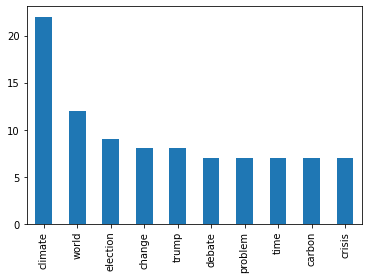

In [41]:
pd.Series(final_list).value_counts()[:10].plot(kind='bar')

## Saving DataFrames

pandas DataFrames can be easily saved as *pickled* objects using the `to_pickle()` method.

The `to_pickle()` method takes a string as input, which defines a path to the file in which the DataFrame should be written.

Let's pickle the DataFrame with the three articles stored under `df` into a file named `pickled_df.pkl` into the directory `data`.

In [42]:
# Write the DataFrame to disk using pickle
df.to_pickle('data/pickled_df.pkl')

We can easily check if the data has been saved successfully by reading the file contents using the `read_pickle()` method.

In [43]:
# Read the pickled DataFrame and assign the result to 'df_2'
df_2 = pd.read_pickle('data/pickled_df.pkl')

# Call the variable to examine the output
df_2

,filename,text
0,WP_1990-08-10-25A.txt,﻿*We Don’t Stand for Bullies': Diverse Voices ...
1,mod_WP_1990-08-10-25A.txt,﻿*We Don’t Stand for Bullies': Diverse Voices ...
2,NYT_1991-01-16-A15.txt,﻿U.S. TAKING STEPS TO CURB TERRORISM: F.B.I. I...
3,WP_1991-01-17-A1B.txt,"﻿U.S., Allies Launch Massive Air War Against T..."
4,mod_WP_1991-01-17-A1B.txt,﻿U.S Allies Launch Massive Air War Against Tar...
5,mod_NYT_1991-01-16-A15.txt,﻿U.S. TAKING STEPS TO CURB TERRORISM: F.B.I. I...


Let's compare the DataFrames, which returns a Boolean value (True/False) for each cell.

In [44]:
df == df_2

,filename,text
0,True,True
1,True,True
2,True,True
3,True,True
4,True,True
5,True,True


This section should have given you a basic idea of the *pandas* library and how DataFrames can be used to store and manipulate textual data.